In [2]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [3]:
df =pd.read_csv("auto_imports1.csv")

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,compression,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.replace(to_replace=['?'],value=[None],inplace=True)
display(df.to_string())

'    fuel_type         body  wheel_base  length  width  heights  curb_weight engine_type cylinders  engine_size  bore stroke  compression horse_power peak_rpm  city_mpg  highway_mpg  price\n0         gas  convertible        88.6   168.8   64.1     48.8         2548        dohc      four          130  3.47   2.68         9.00         111     5000        21           27  13495\n1         gas  convertible        88.6   168.8   64.1     48.8         2548        dohc      four          130  3.47   2.68         9.00         111     5000        21           27  16500\n2         gas    hatchback        94.5   171.2   65.5     52.4         2823        ohcv       six          152  2.68   3.47         9.00         154     5000        19           26  16500\n3         gas        sedan        99.8   176.6   66.2     54.3         2337         ohc      four          109  3.19    3.4        10.00         102     5500        24           30  13950\n4         gas        sedan        99.4   176.6   66.4 

In [5]:
df = df.astype({'bore':'float','stroke':'float','horse_power':'float','peak_rpm':'float'})


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  compression  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

In [7]:
df2=df.drop(columns=['body','engine_type','cylinders'])
df2

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,compression,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,gas,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,gas,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,gas,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,diesel,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [8]:
df2.dropna(inplace = True)

In [9]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
compression    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

In [10]:
df2.to_csv('df2.csv')

 **Replace ['gas', 'diesel'] string values to [0, 1]**

In [11]:
#Your code
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,compression,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [12]:
df2.replace(to_replace=['gas'],value=[0],inplace=True)

In [13]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,compression,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [14]:
df2.replace(to_replace=['diesel'],value=[1],inplace=True)

In [15]:
display(df2.to_string())

'     fuel_type  wheel_base  length  width  heights  curb_weight  engine_size  bore  stroke  compression  horse_power  peak_rpm  city_mpg  highway_mpg  price\n0            0        88.6   168.8   64.1     48.8         2548          130  3.47    2.68         9.00        111.0    5000.0        21           27  13495\n1            0        88.6   168.8   64.1     48.8         2548          130  3.47    2.68         9.00        111.0    5000.0        21           27  16500\n2            0        94.5   171.2   65.5     52.4         2823          152  2.68    3.47         9.00        154.0    5000.0        19           26  16500\n3            0        99.8   176.6   66.2     54.3         2337          109  3.19    3.40        10.00        102.0    5500.0        24           30  13950\n4            0        99.4   176.6   66.4     54.3         2824          136  3.19    3.40         8.00        115.0    5500.0        18           22  17450\n5            0        99.8   177.3   66.3     53.1 

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    195 non-null    int64  
 1   wheel_base   195 non-null    float64
 2   length       195 non-null    float64
 3   width        195 non-null    float64
 4   heights      195 non-null    float64
 5   curb_weight  195 non-null    int64  
 6   engine_size  195 non-null    int64  
 7   bore         195 non-null    float64
 8   stroke       195 non-null    float64
 9   compression  195 non-null    float64
 10  horse_power  195 non-null    float64
 11  peak_rpm     195 non-null    float64
 12  city_mpg     195 non-null    int64  
 13  highway_mpg  195 non-null    int64  
 14  price        195 non-null    int64  
dtypes: float64(9), int64(6)
memory usage: 24.4 KB


In [17]:
df2 = df2.astype({'bore':'float','stroke':'float','horse_power':'float','peak_rpm':'float'})


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    195 non-null    int64  
 1   wheel_base   195 non-null    float64
 2   length       195 non-null    float64
 3   width        195 non-null    float64
 4   heights      195 non-null    float64
 5   curb_weight  195 non-null    int64  
 6   engine_size  195 non-null    int64  
 7   bore         195 non-null    float64
 8   stroke       195 non-null    float64
 9   compression  195 non-null    float64
 10  horse_power  195 non-null    float64
 11  peak_rpm     195 non-null    float64
 12  city_mpg     195 non-null    int64  
 13  highway_mpg  195 non-null    int64  
 14  price        195 non-null    int64  
dtypes: float64(9), int64(6)
memory usage: 24.4 KB


 X and y:  dependent variable is fuel_type, the rest of the variables are your independent variables

In [19]:
#your code
x= df2.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14]].values  
y= df2.iloc[:, 0].values  

## Split  data into training and testing set. Use test_size=0.3, random_state=746 !

In [20]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=746)  

### 1 Use Logistic regression to classify data. Report confusion matrix, classification report and AUC

In [21]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=746)  

In [22]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [23]:
y_pred= classifier.predict(x_test)  


In [24]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [25]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [26]:
cm

array([[50,  0],
       [ 0,  9]])

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [28]:
pred_prob = classifier.predict_proba(x_test)


In [29]:
from sklearn.metrics import roc_auc_score


auc_score= roc_auc_score(y_test, pred_prob[:,1])

In [30]:
auc_score

1.0

In [31]:
print(accuracy_score(y_test, y_pred))


1.0


### 3.2 Use Naive Bayes to classify data. Report confusion matrix, classification report and AUC

In [32]:
#your code
x= df2.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14]].values  
y= df2.iloc[:, 0].values  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=746)  

In [33]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [34]:
y_pred = classifier.predict(x_test)

In [35]:
cm= confusion_matrix(y_test, y_pred)  

In [36]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [37]:
cm

array([[50,  0],
       [ 0,  9]])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [39]:
pred_prob = classifier.predict_proba(x_test)
from sklearn.metrics import roc_auc_score


auc_score= roc_auc_score(y_test, pred_prob[:,1])

In [40]:
auc_score

1.0

In [41]:
print(accuracy_score(y_test,y_pred))

1.0


### 3.3 Use KNN to classify data. First find the optimal k and than run classification. Report confusion matrix, classification report and AUC

In [42]:
#your code
x= df2.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14]].values  
y= df2.iloc[:, 0].values  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=746) 

In [43]:
x_train

array([[1.1000e+02, 1.9090e+02, 7.0300e+01, ..., 2.2000e+01, 2.5000e+01,
        2.5552e+04],
       [1.0910e+02, 1.8880e+02, 6.8800e+01, ..., 1.9000e+01, 2.5000e+01,
        1.9045e+04],
       [9.6300e+01, 1.7240e+02, 6.5400e+01, ..., 2.5000e+01, 3.2000e+01,
        8.1890e+03],
       ...,
       [1.0040e+02, 1.8460e+02, 6.6500e+01, ..., 1.9000e+01, 2.5000e+01,
        1.3499e+04],
       [9.9800e+01, 1.7730e+02, 6.6300e+01, ..., 1.9000e+01, 2.5000e+01,
        1.5250e+04],
       [1.0790e+02, 1.8670e+02, 6.8400e+01, ..., 1.9000e+01, 2.4000e+01,
        1.6630e+04]])

In [44]:
x_train

array([[1.1000e+02, 1.9090e+02, 7.0300e+01, ..., 2.2000e+01, 2.5000e+01,
        2.5552e+04],
       [1.0910e+02, 1.8880e+02, 6.8800e+01, ..., 1.9000e+01, 2.5000e+01,
        1.9045e+04],
       [9.6300e+01, 1.7240e+02, 6.5400e+01, ..., 2.5000e+01, 3.2000e+01,
        8.1890e+03],
       ...,
       [1.0040e+02, 1.8460e+02, 6.6500e+01, ..., 1.9000e+01, 2.5000e+01,
        1.3499e+04],
       [9.9800e+01, 1.7730e+02, 6.6300e+01, ..., 1.9000e+01, 2.5000e+01,
        1.5250e+04],
       [1.0790e+02, 1.8670e+02, 6.8400e+01, ..., 1.9000e+01, 2.4000e+01,
        1.6630e+04]])

In [45]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [48]:
y_pred = classifier.predict(x_test)

In [49]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [52]:
cm= confusion_matrix(y_test, y_pred)  

In [53]:
cm

array([[50,  0],
       [ 8,  1]])

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      1.00      0.93        50
           1       1.00      0.11      0.20         9

    accuracy                           0.86        59
   macro avg       0.93      0.56      0.56        59
weighted avg       0.88      0.86      0.82        59



In [55]:
pred_prob = classifier.predict_proba(x_test)
from sklearn.metrics import roc_auc_score


auc_score= roc_auc_score(y_test, pred_prob[:,1])

In [56]:
auc_score

0.7044444444444444

In [57]:
print(accuracy_score(y_test,y_pred))

0.864406779661017


### 3.4 Random Forest to classify data. Report confusion matrix, classification report and AUC

In [58]:
#your code
x= df2.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14]].values  
y= df2.iloc[:, 0].values  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=746) 

In [59]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [60]:
x_train

array([[1.1000e+02, 1.9090e+02, 7.0300e+01, ..., 2.2000e+01, 2.5000e+01,
        2.5552e+04],
       [1.0910e+02, 1.8880e+02, 6.8800e+01, ..., 1.9000e+01, 2.5000e+01,
        1.9045e+04],
       [9.6300e+01, 1.7240e+02, 6.5400e+01, ..., 2.5000e+01, 3.2000e+01,
        8.1890e+03],
       ...,
       [1.0040e+02, 1.8460e+02, 6.6500e+01, ..., 1.9000e+01, 2.5000e+01,
        1.3499e+04],
       [9.9800e+01, 1.7730e+02, 6.6300e+01, ..., 1.9000e+01, 2.5000e+01,
        1.5250e+04],
       [1.0790e+02, 1.8670e+02, 6.8400e+01, ..., 1.9000e+01, 2.4000e+01,
        1.6630e+04]])

In [61]:
y_train

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

In [62]:
y_pred= classifier.predict(x_test)  

In [63]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [64]:
cm= confusion_matrix(y_test, y_pred)  
cm

array([[50,  0],
       [ 2,  7]])

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.78      0.88         9

    accuracy                           0.97        59
   macro avg       0.98      0.89      0.93        59
weighted avg       0.97      0.97      0.96        59



In [66]:
pred_prob = classifier.predict_proba(x_test)
from sklearn.metrics import roc_auc_score


auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

1.0

In [67]:
print(accuracy_score(y_test,y_pred))

0.9661016949152542


### 5 SVM to classify data. Report confusion matrix, classification report and AUC

In [81]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)


In [82]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [83]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Precision: 1.0
Recall: 1.0


In [86]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 2)}") 
print(f"Precision: {round(precision_score(y_test, y_pred), 2)}")
print(f"Recall: {round(recall_score(y_test, y_pred), 2)}")
print(f"F1_score: {round(f1_score(y_test, y_pred), 2)}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1_score: 1.0


In [88]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



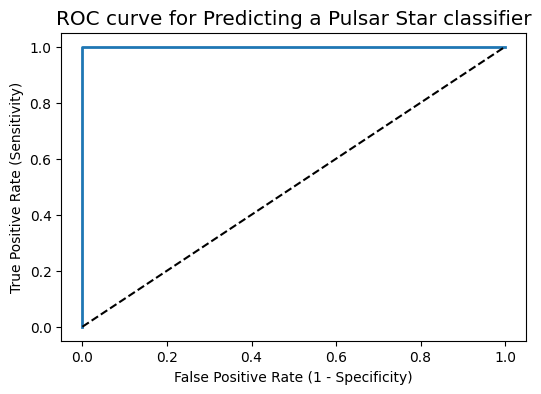

In [90]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [93]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))


ROC AUC : 1.0000


Logistic Regression, naive Bayes and KNN has an accuracy of 100% while SVM has an accuracy of 85%. Comparatively, logistic regression, naive Byaes and KNN did a great job. 

##IMBALANCE

In [68]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
from imblearn.over_sampling import RandomOverSampler
from imblearn import over_sampling
from collections import Counter

In [70]:
ros = RandomOverSampler(random_state=0)
x_resampled,y_resampled = ros.fit_resample(x,y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 175), (1, 175)] (350,)


In [71]:
x_resampled_train, x_resampled_test, y_resampled_train, y_resampled_test = train_test_split(x_resampled, y_resampled, test_size=0.30, random_state=746)

In [72]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  


In [73]:

mdl=classifier.fit(x_resampled_train, y_resampled_train)

In [74]:
y_pred = classifier.predict(x_resampled_test)


S1 = confusion_matrix(y_resampled_test, y_pred)

print(confusion_matrix(y_resampled_test, y_pred))

[[54  0]
 [ 0 51]]


In [75]:
print(classification_report(y_resampled_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        51

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [76]:
auc_score5 = roc_auc_score(y_resampled_test, y_pred)
print('AUC: %.3f' % auc_score5)

AUC: 1.000


In [77]:
print(accuracy_score(y_resampled_test,y_pred))

1.0


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

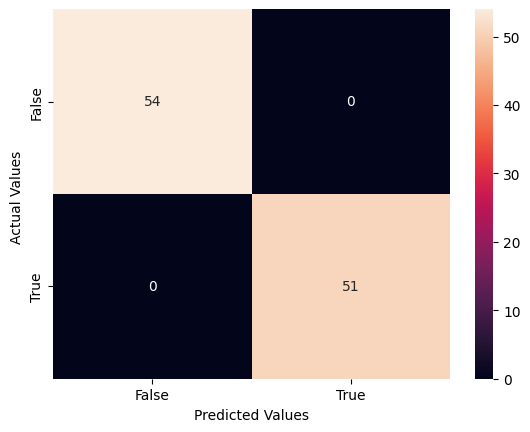

In [78]:
S1 = sns.heatmap(S1, annot=True)

S1.set_xlabel('Predicted Values')
S1.set_ylabel('Actual Values ');


S1.xaxis.set_ticklabels(['False','True'])
S1.yaxis.set_ticklabels(['False','True'])